In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,confusion_matrix,make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
df=pd.read_csv("/content/sample_data/gym_members_exercise_tracking.csv")

# **Summary of Dataset**

In [3]:
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
df.describe().T

count        mean         std     min     25%  \
Age                            973.0   38.683453   12.180928   18.00   28.00   
Weight (kg)                    973.0   73.854676   21.207500   40.00   58.10   
Height (m)                     973.0    1.722580    0.127720    1.50    1.62   
Max_BPM                        973.0  179.883864   11.525686  160.00  170.00   
Avg_BPM                        973.0  143.766701   14.345101  120.00  131.00   
Resting_BPM                    973.0   62.223022    7.327060   50.00   56.00   
Session_Duration (hours)       973.0    1.256423    0.343033    0.50    1.04   
Calories_Burned                973.0  905.422405  272.641516  303.00  720.00   
Fat_Percentage                 973.0   24.976773    6.259419   10.00   21.30   
Water_Intake (liters)          973.0    2.626619    0.600172    1.50    2.20   
Workout_Frequency (days/week)  973.0    3.321686    0.913047    2.00    3.00   
Experience_Level               973.0    1.809866    0.739693    1.00    1.00   
BMI                            973.0   24.912127    6.660879   12.32   20.11   

                                  50%      75%      max  
Age                             40.00    49.00    59.00  
Weight (kg)                     70.00    86.00   129.90  
Height (m)                       1.71     1.80     2.00  
Max_BPM                        180.00   190.00   199.00  
Avg_BPM                        143.00   156.00   169.00  
Resting_BPM                     62.00    68.00    74.00  
Session_Duration (hours)         1.26     1.46     2.00  
Calories_Burned                893.00  1076.00  1783.00  
Fat_Percentage                  26.20    29.30    35.00  
Water_Intake (liters)            2.60     3.10     3.70  
Workout_Frequency (days/week)    3.00     4.00     5.00  
Experience_Level                 2.00     2.00     3.00  
BMI                             24.16    28.56    49.84

In [5]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_data(df)



------------------------------- SHAPE --------------------------------
Rows: 973
Columns: 15
------------------------------- TYPES --------------------------------
Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object
-------------------------------- HEAD --------------------------------
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157     

In [6]:
df.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
dtype: int64

# **Outlier Detection**

In [7]:
num_cols=(df.select_dtypes(["int64","float64"]))
num_cols

Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56         88.3        1.71      180      157           60   
1     46         74.9        1.53      179      151           66   
2     32         68.1        1.66      167      122           54   
3     25         53.2        1.70      190      164           56   
4     38         46.1        1.79      188      158           68   
..   ...          ...         ...      ...      ...          ...   
968   24         87.1        1.74      187      158           67   
969   25         66.6        1.61      184      166           56   
970   59         60.4        1.76      194      120           53   
971   32        126.4        1.83      198      146           62   
972   46         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                        1.69           1313.0            12.6   
1                        1.30            883.0            33.9   
2                        1.11            677.0            33.4   
3                        0.59            532.0            28.8   
4                        0.64            556.0            29.2   
..                        ...              ...             ...   
968                      1.57           1364.0            10.0   
969                      1.38           1260.0            25.0   
970                      1.72            929.0            18.8   
971                      1.10            883.0            28.2   
972                      0.75            542.0            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 13 columns]

In [8]:
def OTH(df,col_name, low_quantile=0.25,up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    print(col_name,low_limit,up_limit)
    return low_limit,up_limit

In [9]:
def detection(dataframe,col_name):
    low_limit,up_limit=OTH(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
                                                  return True
    else:
                                                  return False

In [10]:
for col in list(num_cols):
    print(col,detection(df,col))

Age -3.5 80.5
Age False
Weight (kg) 16.250000000000007 127.85
Weight (kg) True
Height (m) 1.35 2.07
Height (m) False
Max_BPM 140.0 220.0
Max_BPM False
Avg_BPM 93.5 193.5
Avg_BPM False
Resting_BPM 38.0 86.0
Resting_BPM False
Session_Duration (hours) 0.41000000000000014 2.09
Session_Duration (hours) False
Calories_Burned 186.0 1610.0
Calories_Burned True
Fat_Percentage 9.3 41.3
Fat_Percentage False
Water_Intake (liters) 0.8500000000000003 4.45
Water_Intake (liters) False
Workout_Frequency (days/week) 1.5 5.5
Workout_Frequency (days/week) False
Experience_Level -0.5 3.5
Experience_Level False
BMI 7.4350000000000005 41.235
BMI True


Text(0.5, 1.0, 'BMI Boxplot')

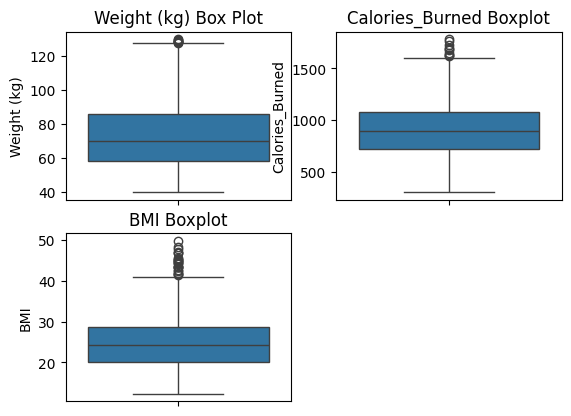

In [11]:
plt.subplot(2,2,1)
sns.boxplot(df["Weight (kg)"])
plt.title("Weight (kg) Box Plot")


plt.subplot(2,2,2)
sns.boxplot(df["Calories_Burned"])
plt.title("Calories_Burned Boxplot")


plt.subplot(2,2,3)
sns.boxplot(df["BMI"])
plt.title("BMI Boxplot")




# **Distribution of Features that Have Outliers**

# **Weight**

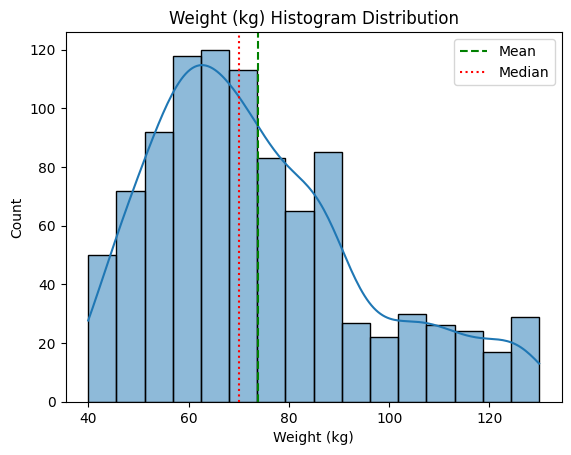

In [12]:
sns.histplot(df["Weight (kg)"],kde=True)
plt.axvline(np.mean(df["Weight (kg)"]),ls="--",c="g",label="Mean")
plt.axvline(np.median(df["Weight (kg)"]),ls=":",c="r",label="Median")
plt.title("Weight (kg) Histogram Distribution");
plt.legend()

In [13]:
from scipy.stats import kurtosis
kurtosis(df["Weight (kg)"])

-0.030006158939854366

Low kurtosis value means distribution of feature is close to normal which means no heavy tails and less outliers

In [14]:
df[df["Weight (kg)"]>127.85]

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
96    56   Male        129.0        1.78      194      126           64   
122   56   Male        129.5        1.95      160      129           66   
180   20   Male        128.2        1.84      164      132           58   
283   20   Male        128.4        1.92      167      145           57   
291   55   Male        128.4        1.68      178      165           52   
593   55   Male        129.9        1.73      187      155           60   
614   28   Male        128.4        1.86      173      158           71   
648   19   Male        127.9        1.93      185      168           70   
854   48   Male        129.2        1.61      193      167           62   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
96                       1.29            805.0         Yoga            27.1   
122                      1.00            639.0     Strength            25.2   
180                      0.83            603.0         HIIT            26.2   
283                      0.63            502.0       Cardio            26.1   
291                      1.13            923.0       Cardio            20.4   
593                      0.69            529.0         Yoga            21.7   
614                      1.06            921.0     Strength            23.6   
648                      1.27           1173.0     Strength            21.8   
854                      1.06            876.0         Yoga            21.4   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
96                     2.7                              2                 1   
122                    3.5                              2                 1   
180                    2.3                              3                 1   
283                    2.0                              2                 1   
291                    2.6                              4                 2   
593                    3.1                              3                 1   
614                    3.3                              4                 2   
648                    3.0                              4                 2   
854                    2.9                              4                 2   

       BMI  
96   40.71  
122  34.06  
180  37.87  
283  34.83  
291  45.49  
593  43.40  
614  37.11  
648  34.34  
854  49.84

In [15]:
df[df["Weight (kg)"]>127.85]["Weight (kg)"].count()

9

In [16]:
(df[df["Weight (kg)"]>127.85]["Weight (kg)"].count())/(df["Weight (kg)"].count())

0.009249743062692703

As we can see outliers are so less in weight feature

# **Calories Burned**

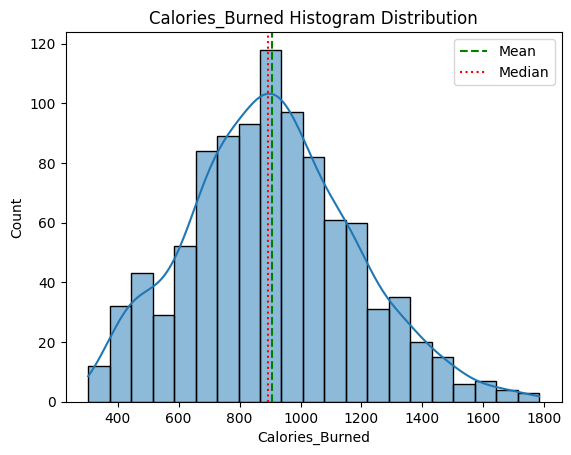

In [17]:
sns.histplot(df["Calories_Burned"],kde=True)
plt.axvline(np.mean(df["Calories_Burned"]),ls="--",c="g",label="Mean")
plt.axvline(np.median(df["Calories_Burned"]),ls=":",c="r",label="Median")
plt.title("Calories_Burned Histogram Distribution");
plt.legend()

In [18]:
kurtosis(df["Calories_Burned"])

-0.06192250620394191

In [19]:
df[df["Calories_Burned"]>1610]

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
90    25    Male         81.5        1.61      170      159           63   
99    24  Female         60.1        1.79      170      165           63   
124   26    Male         86.2        1.68      189      157           72   
475   27    Male         89.3        1.64      192      162           64   
511   39    Male         86.2        1.82      191      160           72   
572   36    Male         88.0        1.71      185      160           73   
646   22    Male         88.5        1.62      174      162           69   
712   19    Male         82.4        1.96      174      169           62   
728   47    Male         87.2        1.64      177      165           50   
910   32    Male         89.8        1.92      199      168           67   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
90                       1.93           1688.0         HIIT            10.9   
99                       1.97           1625.0       Cardio            15.9   
124                      1.97           1701.0     Strength            13.3   
475                      1.82           1622.0         HIIT            12.1   
511                      1.96           1725.0     Strength            10.2   
572                      1.87           1646.0         HIIT            12.0   
646                      1.88           1675.0     Strength            10.7   
712                      1.90           1766.0         HIIT            10.1   
728                      2.00           1634.0     Strength            15.0   
910                      1.93           1783.0     Strength            10.6   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
90                     3.5                              4                 3   
99                     2.7                              4                 3   
124                    3.5                              5                 3   
475                    3.5                              4                 3   
511                    3.5                              5                 3   
572                    3.5                              5                 3   
646                    3.5                              5                 3   
712                    3.5                              5                 3   
728                    3.5                              4                 3   
910                    3.5                              4                 3   

       BMI  
90   31.44  
99   18.76  
124  30.54  
475  33.20  
511  26.02  
572  30.09  
646  33.72  
712  21.45  
728  32.42  
910  24.36

In [20]:
df[df["Calories_Burned"]>1610]["Calories_Burned"].count()

10

In [21]:
df[df["Calories_Burned"]>1610]["Calories_Burned"].count()/df["Calories_Burned"].count()

0.010277492291880781

# **BMI**

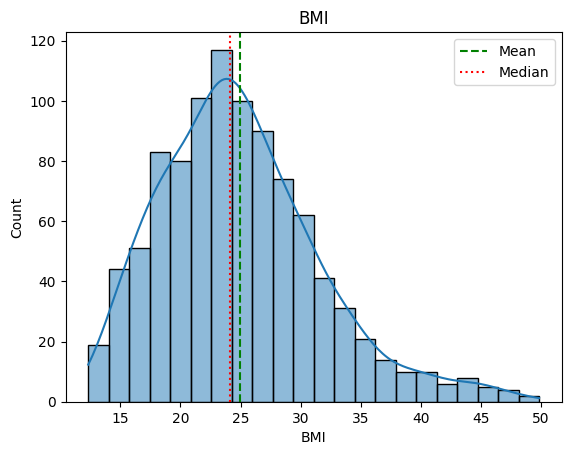

In [22]:
sns.histplot(df["BMI"],kde=True)
plt.axvline(np.mean(df["BMI"]),ls="--",c="g",label="Mean")
plt.axvline(np.median(df["BMI"]),ls=":",c="r",label="Median")
plt.title("BMI");
plt.legend()

In [23]:
kurtosis(df["BMI"])

0.7332663630304221

In [24]:
df[df["BMI"]>41.235]

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
10    41   Male        120.8        1.67      188      146           54   
12    57   Male        112.5        1.61      195      165           61   
35    26   Male        127.6        1.73      167      160           62   
55    23   Male        114.8        1.60      182      163           60   
133   21   Male        125.2        1.66      196      159           60   
251   33   Male        117.0        1.61      166      130           55   
261   57   Male        126.8        1.63      161      133           73   
291   55   Male        128.4        1.68      178      165           52   
302   36   Male        123.7        1.69      185      138           73   
345   43   Male        127.7        1.69      171      155           53   
445   33   Male        106.5        1.60      183      152           74   
470   34   Male        124.6        1.63      161      136           66   
524   36   Male        112.4        1.63      164      135           58   
593   55   Male        129.9        1.73      187      155           60   
603   36   Male        109.8        1.62      193      141           68   
687   18   Male        125.9        1.67      172      153           60   
710   38   Male        123.3        1.62      161      165           65   
718   51   Male        115.3        1.67      189      139           55   
833   59   Male        126.4        1.69      168      149           68   
854   48   Male        129.2        1.61      193      167           62   
868   47   Male        127.8        1.65      198      157           60   
916   22   Male        117.3        1.68      172      134           57   
924   18   Male        118.6        1.64      188      134           67   
936   54   Male        117.2        1.62      172      143           56   
945   35   Male        127.1        1.62      187      128           69   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
10                       0.82            593.0         HIIT            20.5   
12                       1.24           1013.0       Cardio            22.1   
35                       1.32           1162.0     Strength            27.3   
55                       1.47           1318.0       Cardio            21.7   
133                      1.38           1207.0         HIIT            29.8   
251                      1.04            744.0         HIIT            25.1   
261                      0.96            632.0         Yoga            20.8   
291                      1.13            923.0       Cardio            20.4   
302                      1.30            987.0       Cardio            20.4   
345                      1.14            875.0       Cardio            24.1   
445                      1.40           1170.0     Strength            27.3   
470                      1.41           1055.0         HIIT            27.6   
524                      1.02            757.0       Cardio            25.0   
593                      0.69            529.0         Yoga            21.7   
603                      0.84            651.0         HIIT            24.4   
687                      1.46           1229.0         Yoga            20.6   
710                      1.34           1216.0         Yoga            21.2   
718                      1.38            950.0         Yoga            24.4   
833                      1.24            915.0     Strength            29.5   
854                      1.06            876.0         Yoga            21.4   
868                      0.77            598.0       Cardio            28.7   
916                      1.24            914.0         Yoga            28.5   
924                      0.94            693.0       Cardio            25.6   
936                      1.04            736.0         HIIT            23.1   
945                      1.02            718.0     Strength            23.3   


In [25]:
df[df["BMI"]>41.235]["BMI"].count()

25

In [26]:
df[df["BMI"]>41.235]["BMI"].count()/df["BMI"].count()

0.025693730729701953

# **Outlier Treatment**

In [27]:
def replace(dataframe,variables):
    low_limit, up_limit= OTH(dataframe,variables)
    dataframe.loc[(dataframe[variables]<low_limit),variables]=low_limit
    dataframe.loc[(dataframe[variables]>up_limit),variables]=up_limit

In [28]:
for col in num_cols:
    print(col,replace(df,col))

Age -3.5 80.5
Age None
Weight (kg) 16.250000000000007 127.85
Weight (kg) None
Height (m) 1.35 2.07
Height (m) None
Max_BPM 140.0 220.0
Max_BPM None
Avg_BPM 93.5 193.5
Avg_BPM None
Resting_BPM 38.0 86.0
Resting_BPM None
Session_Duration (hours) 0.41000000000000014 2.09
Session_Duration (hours) None
Calories_Burned 186.0 1610.0
Calories_Burned None
Fat_Percentage 9.3 41.3
Fat_Percentage None
Water_Intake (liters) 0.8500000000000003 4.45
Water_Intake (liters) None
Workout_Frequency (days/week) 1.5 5.5
Workout_Frequency (days/week) None
Experience_Level -0.5 3.5
Experience_Level None
BMI 7.4350000000000005 41.235
BMI None


<ipython-input-27-703c54c727bd>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variables]<low_limit),variables]=low_limit
<ipython-input-27-703c54c727bd>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '93.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variables]<low_limit),variables]=low_limit
<ipython-input-27-703c54c727bd>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variables]<low_limit),variables]=low_limit
<ipython-input-27-70

# **Categorical Variable Visualization**

<Axes: ylabel='Gender'>

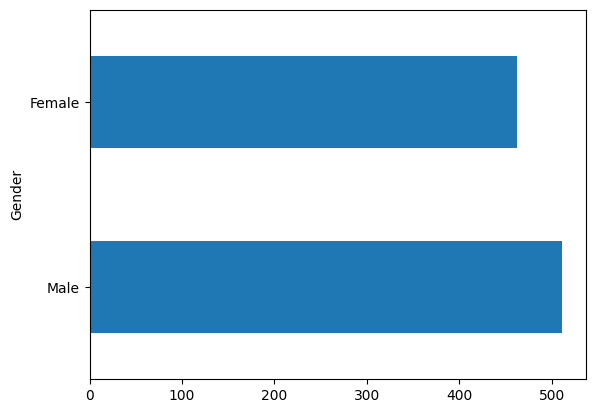

In [29]:
df["Gender"].value_counts().plot.barh()

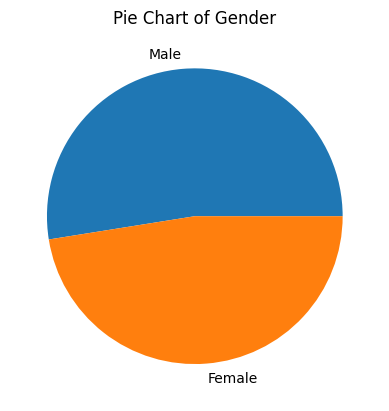

In [30]:
Male=(df['Gender'] == 'Male').value_counts().get(True, 0)
Female=(df["Gender"]=="Female").value_counts().get(True, 0)

numbers = [Male,Female ]
labels = ['Male', 'Female']
plt.pie(numbers, labels=labels)
plt.title("Pie Chart of Gender")

plt.show()

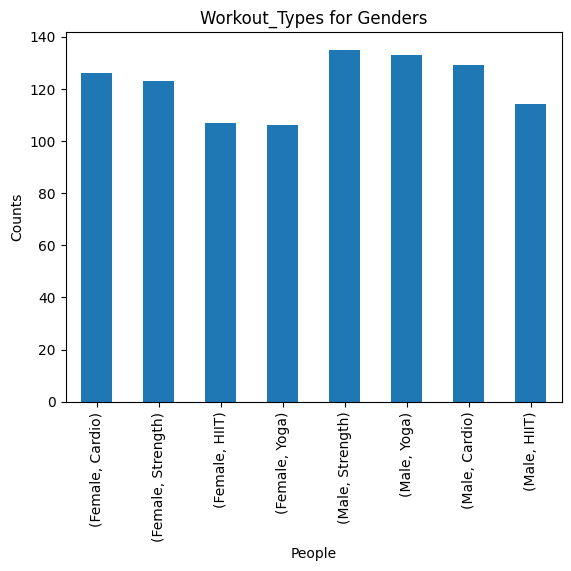

In [31]:
df.groupby(df["Gender"])["Workout_Type"].value_counts().plot(kind='bar')
plt.xlabel('People')
plt.ylabel('Counts')
plt.title('Workout_Types for Genders')
plt.show()

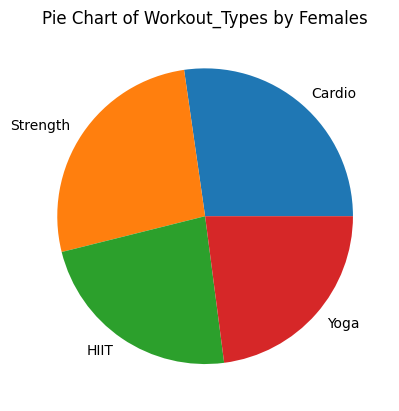

In [32]:
Cardio=((df['Gender'] == 'Female')&(df['Workout_Type'] == 'Cardio')).value_counts().get(True, 0)
Strength=((df['Gender'] == 'Female')&(df['Workout_Type'] == 'Strength')).value_counts().get(True, 0)
HIIT=((df['Gender'] == 'Female')&(df['Workout_Type'] == 'HIIT')).value_counts().get(True, 0)
Yoga=((df['Gender'] == 'Female')&(df['Workout_Type'] == 'Yoga')).value_counts().get(True, 0)
numbers = [Cardio,Strength,HIIT,Yoga]
labels = ["Cardio","Strength","HIIT","Yoga"]
plt.pie(numbers, labels=labels)
plt.title("Pie Chart of Workout_Types by Females")

plt.show()

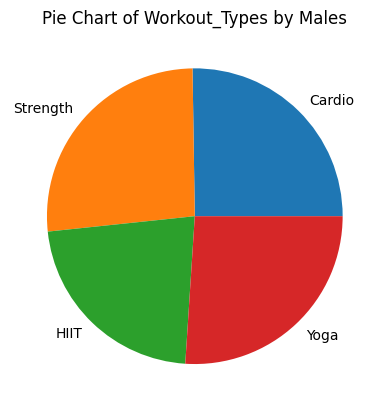

In [ ]:
Cardio=((df['Gender'] == 'Male')&(df['Workout_Type'] == 'Cardio')).value_counts().get(True, 0)
Strength=((df['Gender'] == 'Male')&(df['Workout_Type'] == 'Strength')).value_counts().get(True, 0)
HIIT=((df['Gender'] == 'Male')&(df['Workout_Type'] == 'HIIT')).value_counts().get(True, 0)
Yoga=((df['Gender'] == 'Male')&(df['Workout_Type'] == 'Yoga')).value_counts().get(True, 0)
numbers = [Cardio,Strength,HIIT,Yoga]
labels = ["Cardio","Strength","HIIT","Yoga"]
plt.pie(numbers, labels=labels)
plt.title("Pie Chart of Workout_Types by Males")

plt.show()

# **Numerical Values Visualization**

# **Age**

<ipython-input-12-da669c542b5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Workout_Type", y="Age", data=df, palette="viridis", size=7)


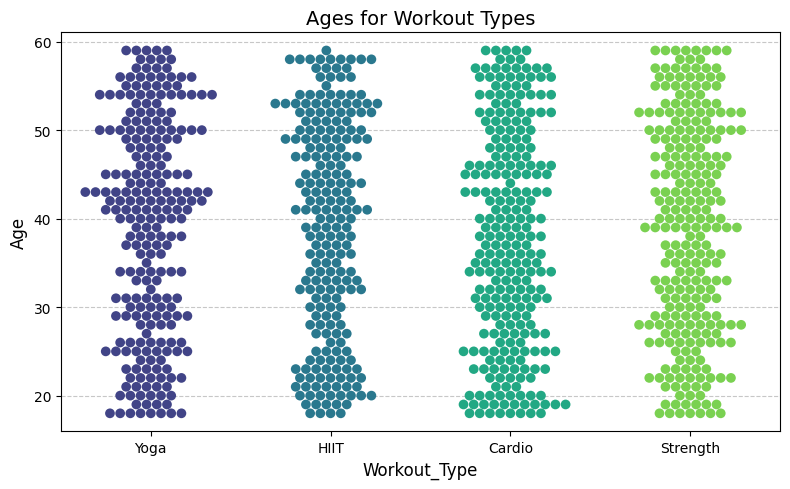

In [ ]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x="Workout_Type", y="Age", data=df, palette="viridis", size=7)

plt.title("Ages for Workout Types", fontsize=14)
plt.xlabel("Workout_Type", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


<ipython-input-14-c2b22dff0949>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Workout_Type", y="Age", data=df, palette="muted", inner="quartile")


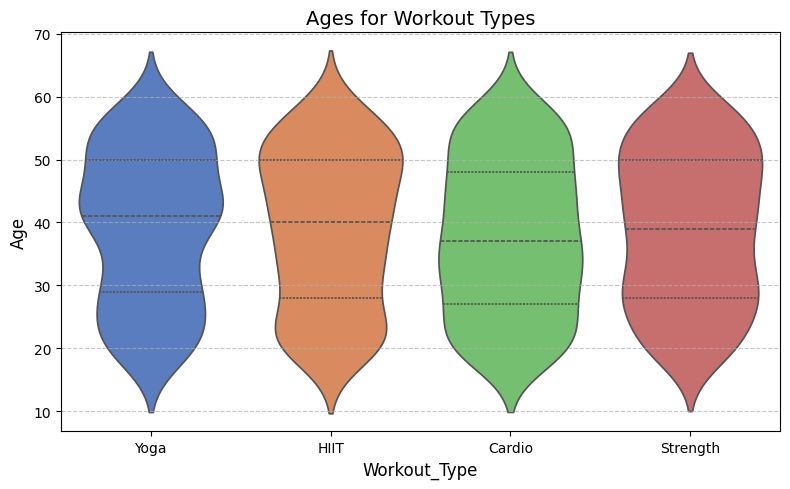

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Workout_Type", y="Age", data=df, palette="muted", inner="quartile")
plt.title("Ages for Workout Types", fontsize=14)
plt.xlabel("Workout_Type", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

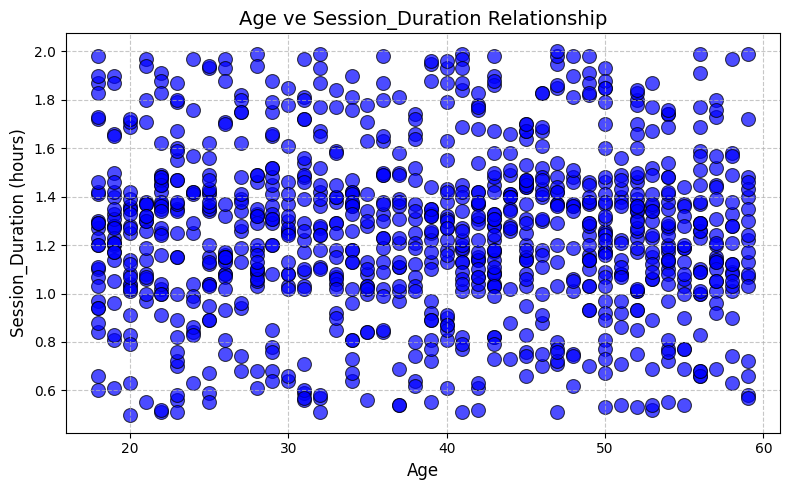

In [ ]:



plt.figure(figsize=(8, 5))
sns.scatterplot(x="Age", y="Session_Duration (hours)", data=df, color="blue", s=100, alpha=0.7, edgecolor="black")


plt.title("Age ve Session_Duration Relationship", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Session_Duration (hours)", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


# **Fat Percentage**

<ipython-input-18-4239589d62e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Workout_Type", y="Fat_Percentage", data=df, palette="viridis", size=7)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


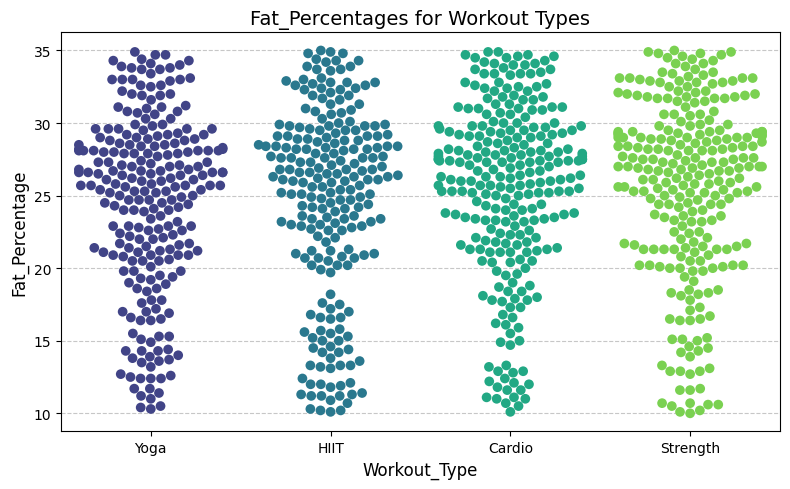

In [ ]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x="Workout_Type", y="Fat_Percentage", data=df, palette="viridis", size=7)

plt.title("Fat_Percentages for Workout Types", fontsize=14)
plt.xlabel("Workout_Type", fontsize=12)
plt.ylabel("Fat_Percentage", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


<ipython-input-20-06842166beb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Workout_Type", y="Fat_Percentage", data=df, palette="muted",inner="quartile")


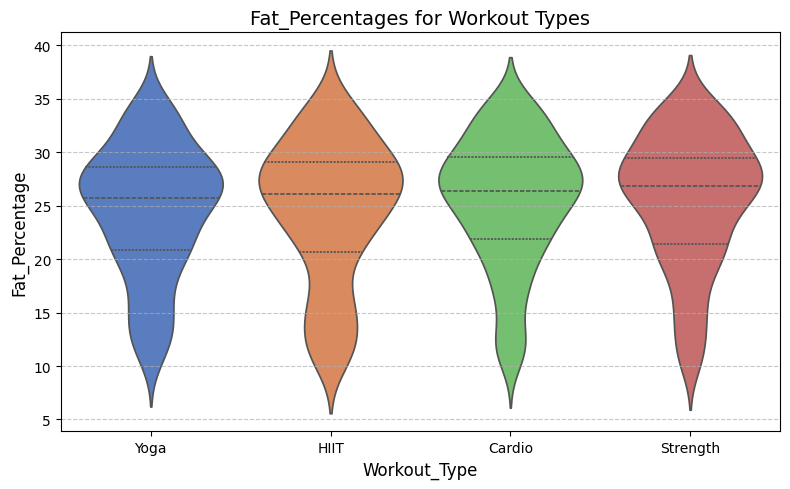

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Workout_Type", y="Fat_Percentage", data=df, palette="muted",inner="quartile")
plt.title("Fat_Percentages for Workout Types", fontsize=14)
plt.xlabel("Workout_Type", fontsize=12)
plt.ylabel("Fat_Percentage", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


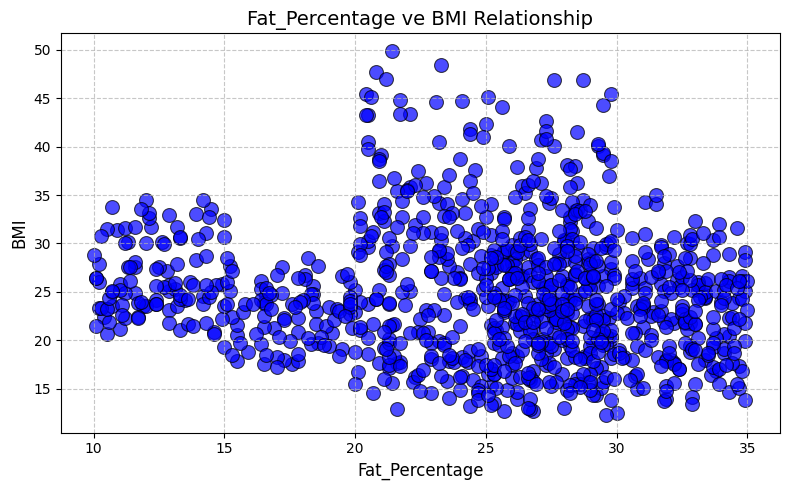

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Fat_Percentage", y="BMI", data=df, color="blue", s=100, alpha=0.7, edgecolor="black")


plt.title("Fat_Percentage ve BMI Relationship", fontsize=14)
plt.xlabel("Fat_Percentage", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

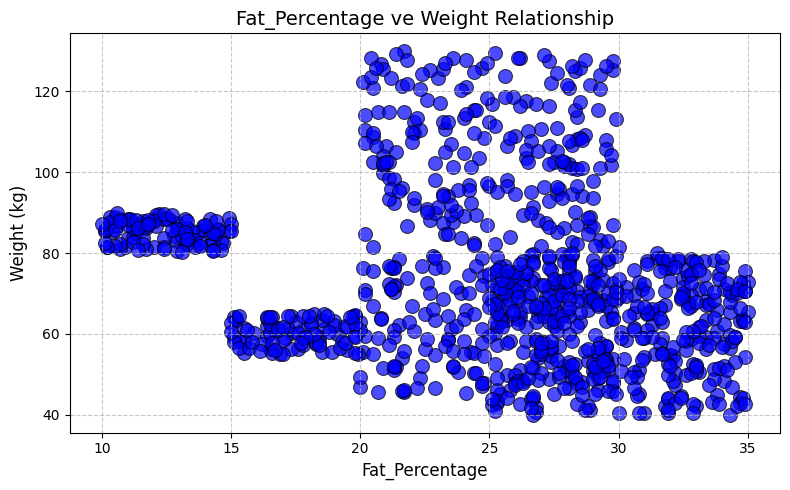

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Fat_Percentage", y="Weight (kg)", data=df, color="blue", s=100, alpha=0.7, edgecolor="black")


plt.title("Fat_Percentage ve Weight Relationship", fontsize=14)
plt.xlabel("Fat_Percentage", fontsize=12)
plt.ylabel("Weight (kg)", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

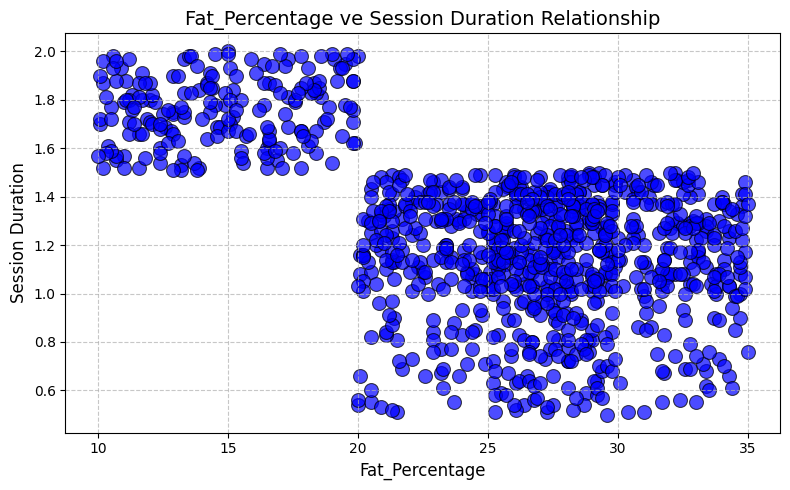

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Fat_Percentage", y="Session_Duration (hours)", data=df, color="blue", s=100, alpha=0.7, edgecolor="black")


plt.title("Fat_Percentage ve Session Duration Relationship", fontsize=14)
plt.xlabel("Fat_Percentage", fontsize=12)
plt.ylabel("Session Duration", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

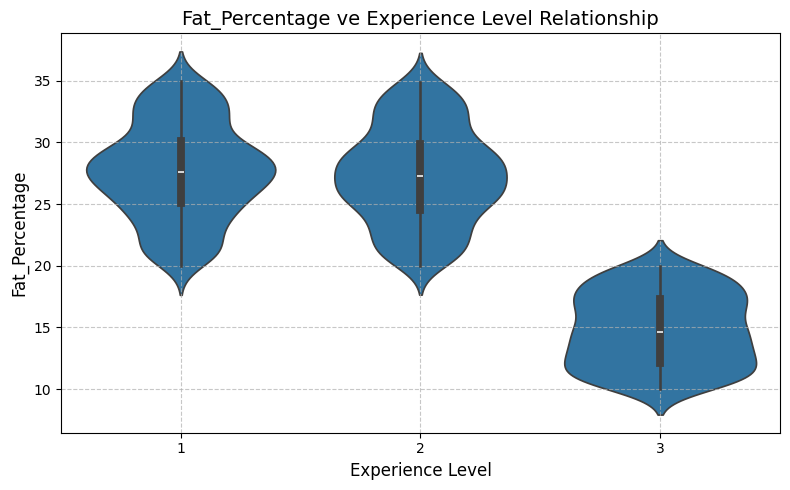

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Experience_Level", y="Fat_Percentage", data=df)


plt.title("Fat_Percentage ve Experience Level Relationship", fontsize=14)
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Fat_Percentage", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

# **Calories Burned**

<ipython-input-33-1832490598e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Workout_Type", y="Calories_Burned", data=df, palette="viridis", size=7)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist

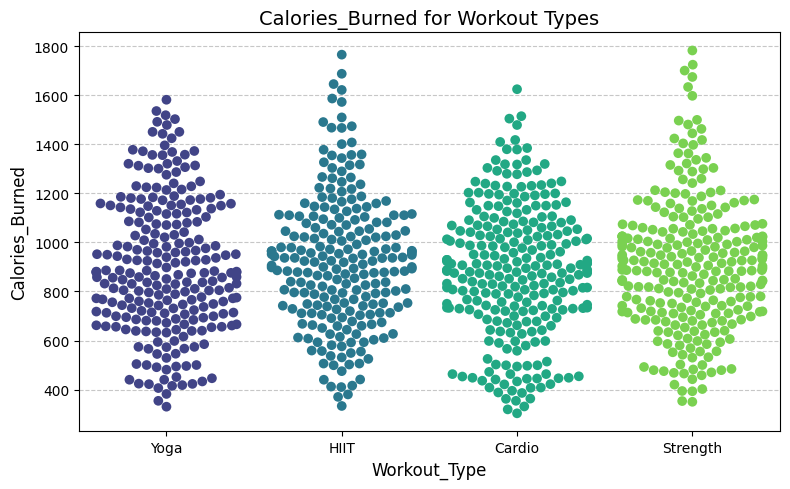

In [ ]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x="Workout_Type", y="Calories_Burned", data=df, palette="viridis", size=7)

plt.title("Calories_Burned for Workout Types", fontsize=14)
plt.xlabel("Workout_Type", fontsize=12)
plt.ylabel("Calories_Burned", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

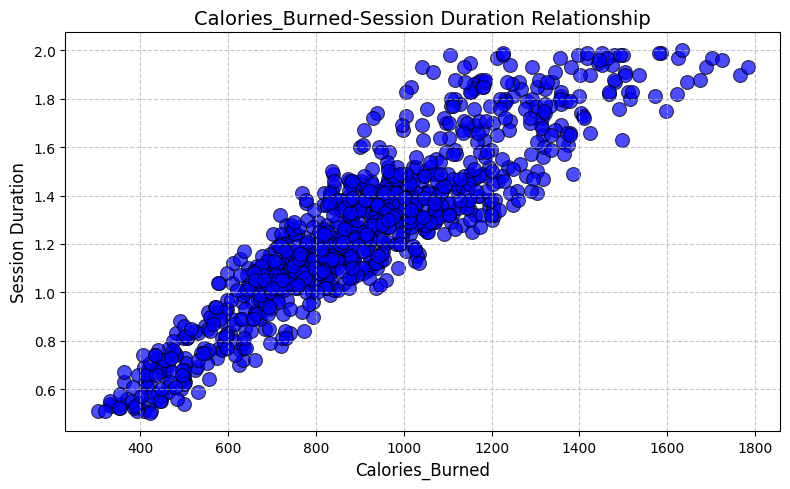

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Calories_Burned", y="Session_Duration (hours)", data=df, color="blue", s=100, alpha=0.7, edgecolor="black")


plt.title("Calories_Burned-Session Duration Relationship", fontsize=14)
plt.xlabel("Calories_Burned", fontsize=12)
plt.ylabel("Session Duration", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

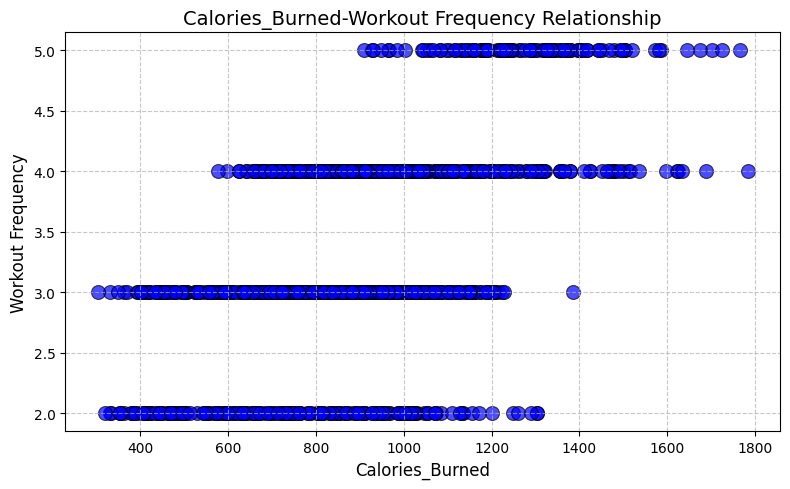

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Calories_Burned", y="Workout_Frequency (days/week)", data=df, color="blue", s=100, alpha=0.7, edgecolor="black")


plt.title("Calories_Burned-Workout Frequency Relationship", fontsize=14)
plt.xlabel("Calories_Burned", fontsize=12)
plt.ylabel("Workout Frequency", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

# **Experience_Level**

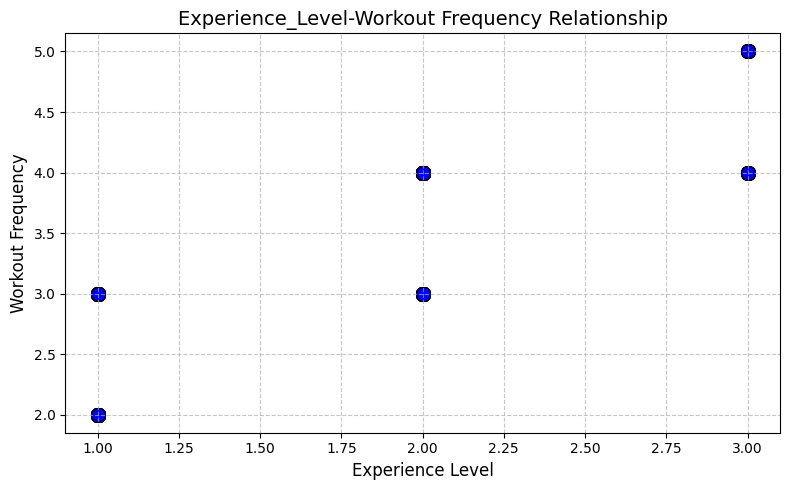

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Experience_Level", y="Workout_Frequency (days/week)", data=df, color="blue", s=100, alpha=0.7, edgecolor="black")


plt.title("Experience_Level-Workout Frequency Relationship", fontsize=14)
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Workout Frequency", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

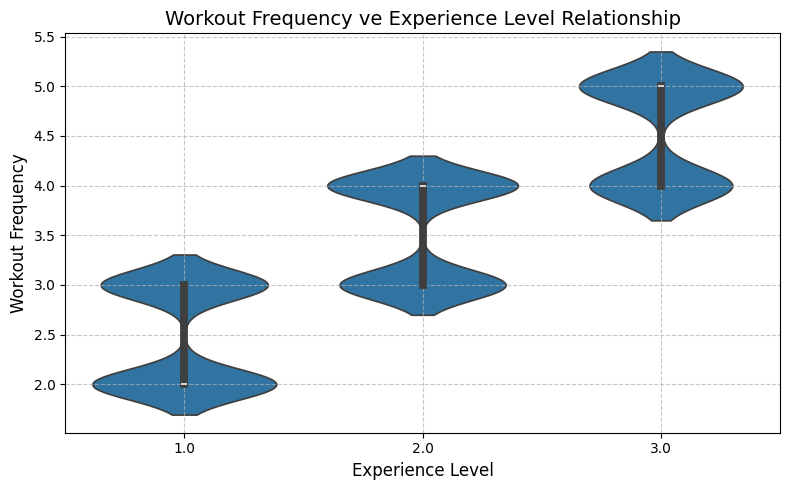

In [36]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Experience_Level", y="Workout_Frequency (days/week)", data=df)


plt.title("Workout Frequency ve Experience Level Relationship", fontsize=14)
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Workout Frequency", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

# **Numerical Correlation Analysis**

<Axes: >

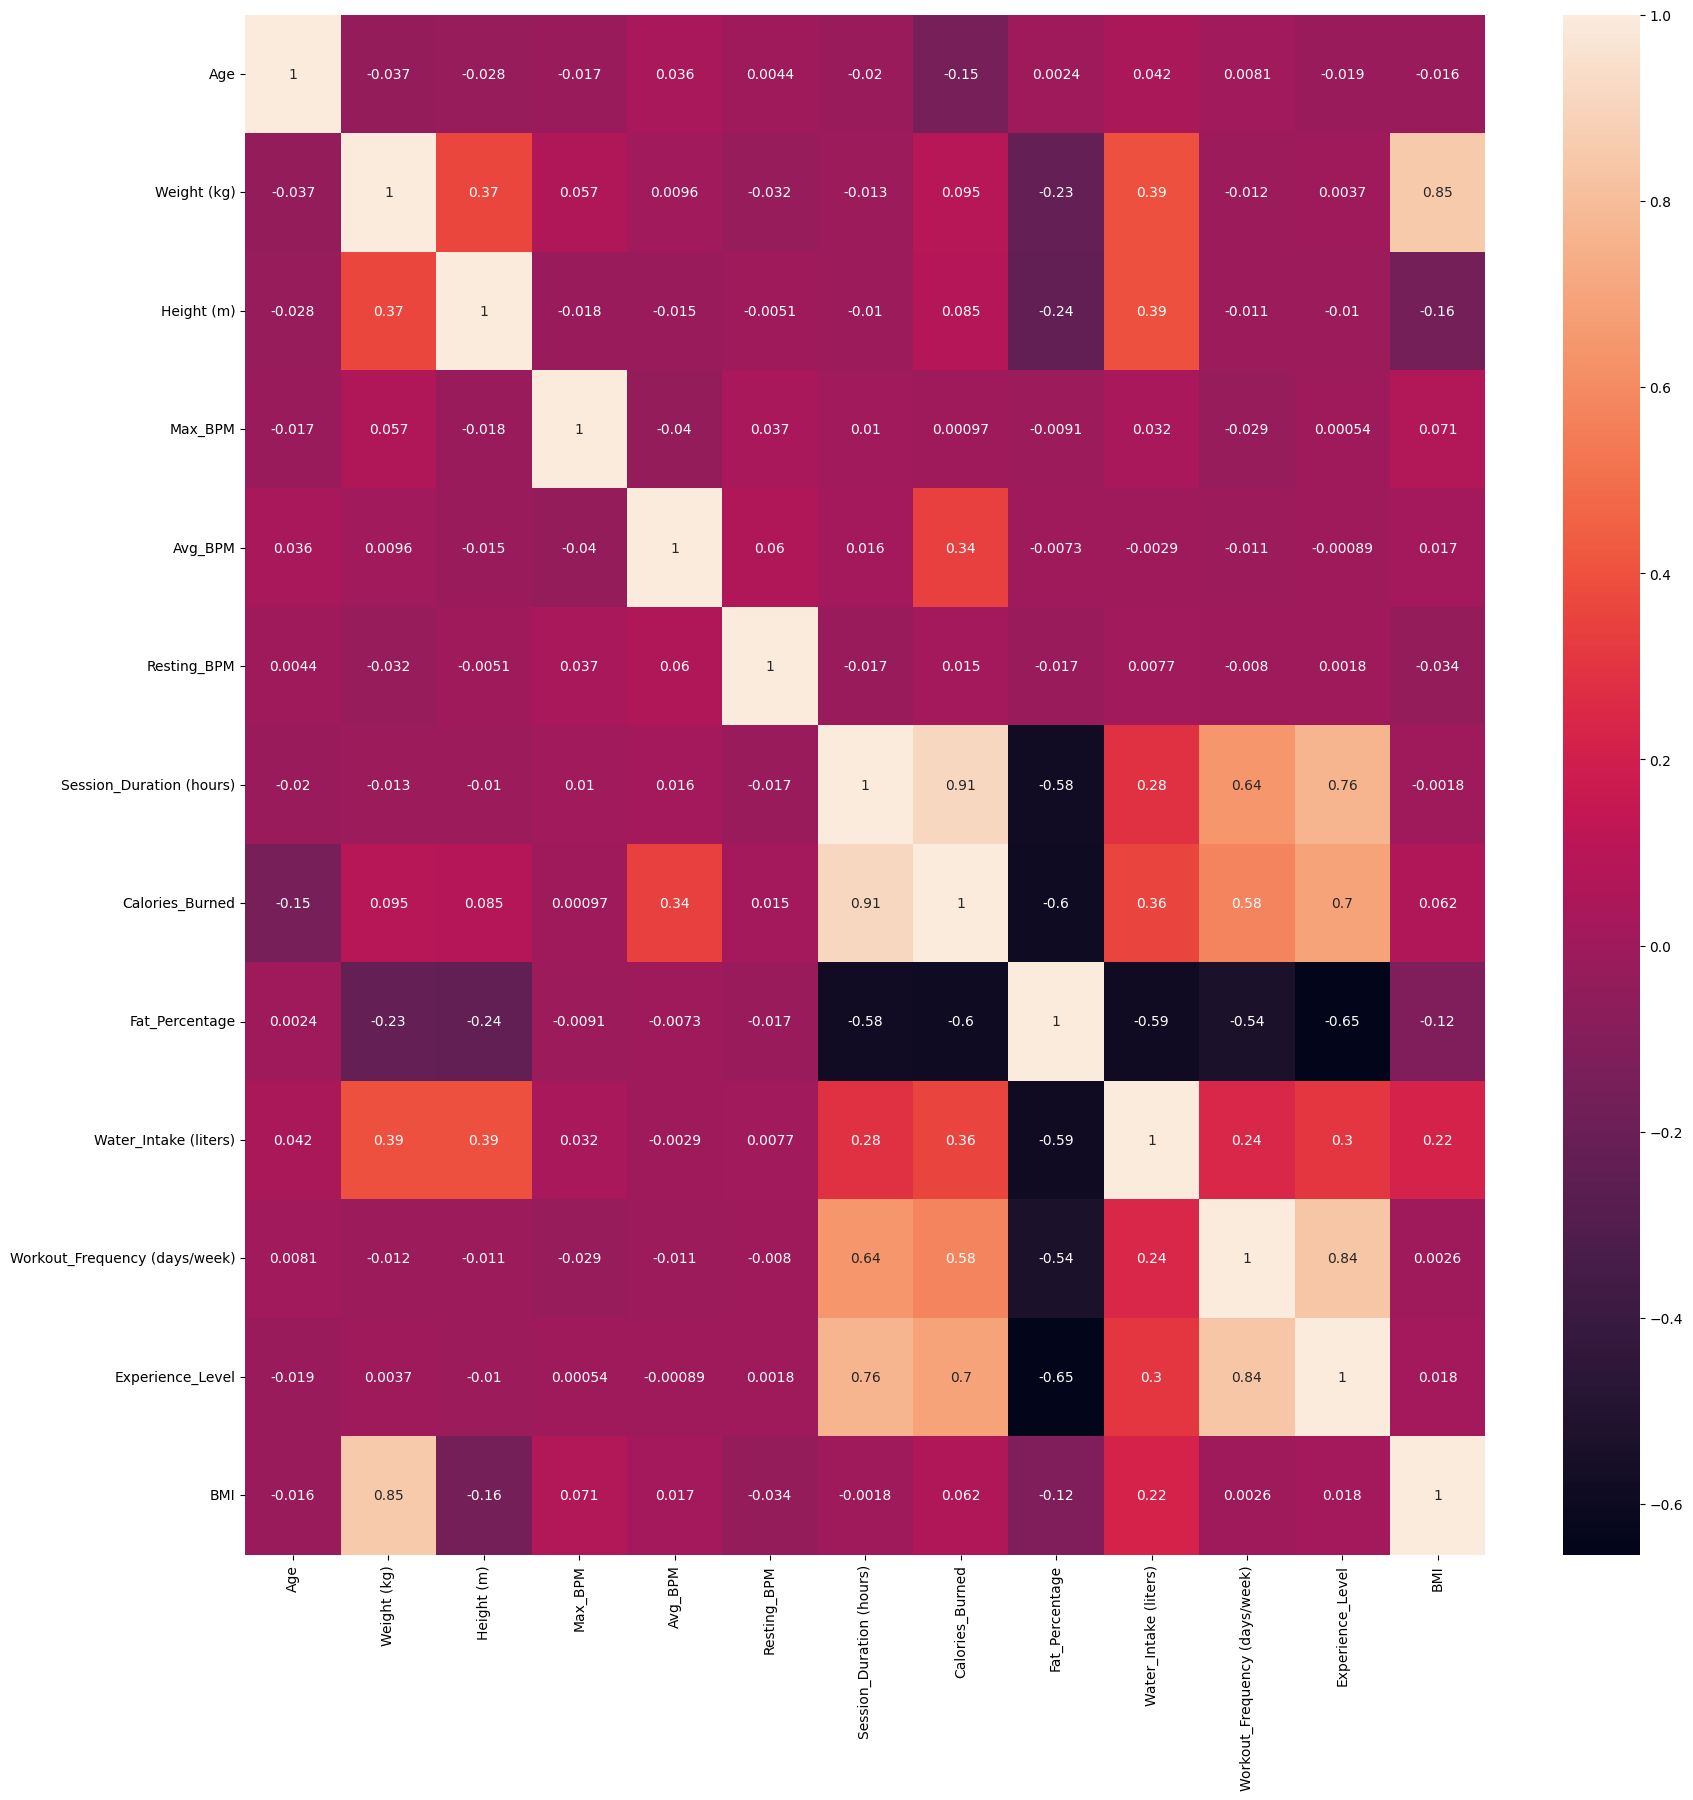

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df[list(num_cols)].corr(),annot=True)

# **Extra Correlation Analysis for Discrete Numerical Variables**

In [41]:
from scipy import stats

x=df["Experience_Level"]
y=df["Workout_Frequency (days/week)"]

res = stats.spearmanr(x,y)
print(res.statistic)

0.8357831620002422


In [42]:


x=df["Experience_Level"]
y=df["Calories_Burned"]

res = stats.spearmanr(x,y)
print(res.statistic)

0.6586002144147983


# **Encoding**

In [47]:
df_le = df.copy()

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df_le[column_name] = label_encoder.fit_transform(df[column_name])

In [48]:
for col in list(df_le.columns):
  label_encoding(col)
df_le.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   38       1          375          21       20       37           10   
1   28       0          273           3       19       31           16   
2   14       0          214          16        7        2            4   
3    7       1           83          20       30       44            6   
4   20       1           35          29       28       38           18   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                       117              550             3              23   
1                        78              289             1             227   
2                        59              137             0             222   
3                         9               70             2             176   
4                        14               78             2             180   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  BMI  
0                     20                              2                 2  605  
1                      6                              2                 1  654  
2                      8                              2                 1  395  
3                      6                              1                 0  143  
4                     13                              1                 0   23

# **Train-Test Split and Scaling**

In [49]:
X=df_le.drop("Workout_Type",axis=1)
y=df_le["Workout_Type"]

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models_dict = {
    'LogisticRegression': {
    'model': LogisticRegression()},

  'KNeighborsClassifier': {
    'model': KNeighborsClassifier()
  },

  'Perceptron': {
    'model': Perceptron()
  },

  }

In [ ]:
for key, item in models_dict.items():
  model = item.get('model')

  model.fit(X_train_scaled,y_train)

In [ ]:
def classification_performance_evaluation(key, preds):

    accuracy_scored = accuracy_score(y_test, preds)


    precision_scored = precision_score(y_test, preds, average='weighted')
    recall_scored = recall_score(y_test, preds, average='weighted')
    f1_scored = f1_score(y_test, preds, average='weighted')
    roc_auc_scored = None


    print("*** Model: ", key, ' ***')
    print("Accuracy:", accuracy_scored)
    print("Precision:", precision_scored)
    print("Recall:", recall_scored)
    print("F1-Score:", f1_scored)



    print()


In [ ]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = model.predict(X_test_scaled)

  item.update({"y_preds": y_preds})

In [ ]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = item.get('y_preds')
  classification_performance_evaluation(key,y_preds)

*** Model:  LogisticRegression  ***
Accuracy: 0.3073770491803279
Precision: 0.3123694881624318
Recall: 0.3073770491803279
F1-Score: 0.3058161422624354

*** Model:  KNeighborsClassifier  ***
Accuracy: 0.2336065573770492
Precision: 0.23904110596879916
Recall: 0.2336065573770492
F1-Score: 0.22181065803537925

*** Model:  Perceptron  ***
Accuracy: 0.23770491803278687
Precision: 0.23912945897422694
Recall: 0.23770491803278687
F1-Score: 0.21759524022490945



# **5 Folds Validation of Models**

In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Perceptron": Perceptron()
}


for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name}:")
    print(f"Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.4f}")
    print(f"Standard Deviation: {np.std(scores):.4f}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression:
Accuracy Scores: [0.27692308 0.22564103 0.23589744 0.25257732 0.29896907]
Mean Accuracy: 0.2580
Standard Deviation: 0.0268

K-Nearest Neighbors:
Accuracy Scores: [0.24102564 0.26153846 0.26666667 0.22680412 0.24226804]
Mean Accuracy: 0.2477
Standard Deviation: 0.0146

Perceptron:
Accuracy Scores: [0.26153846 0.24102564 0.18974359 0.19587629 0.30412371]
Mean Accuracy: 0.2385
Standard Deviation: 0.0425



# **Roc-Auc Curve of Models**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


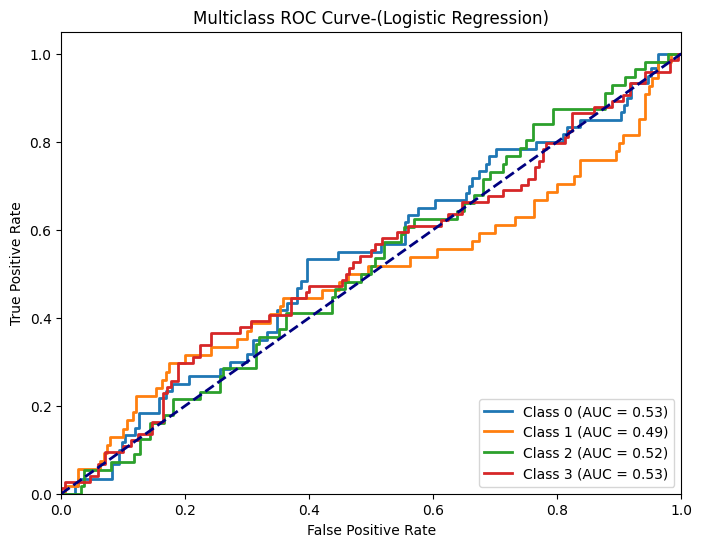

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


prob_preds = model.predict_proba(X_test)

n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))


plt.figure(figsize=(8, 6))
for i in range(n_classes):

    fpr, tpr, _ = roc_curve(y_test_bin[:, i], prob_preds[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Multiclass ROC Curve-(Logistic Regression)")
plt.legend(loc="lower right")
plt.show()


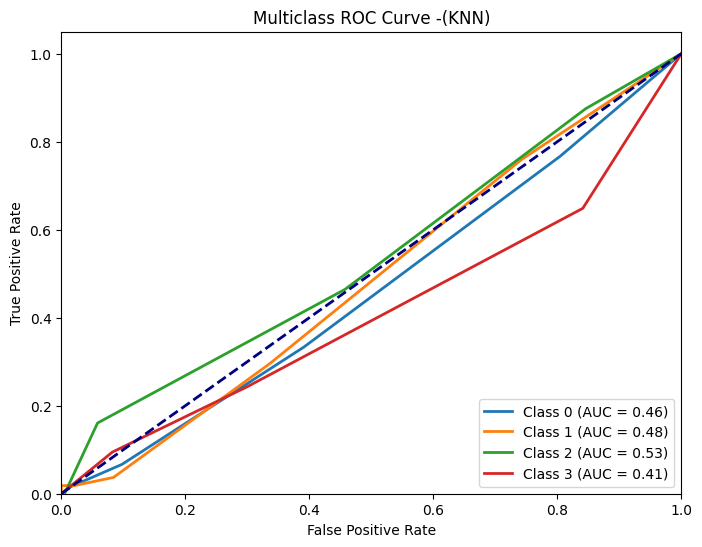

In [ ]:

model = KNeighborsClassifier()
model.fit(X_train, y_train)


prob_preds = model.predict_proba(X_test)

n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

plt.figure(figsize=(8, 6))
for i in range(n_classes):

    fpr, tpr, _ = roc_curve(y_test_bin[:, i], prob_preds[:, i])
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve -(KNN)')
plt.legend(loc="lower right")
plt.show()


<ipython-input-388-bdab79ad1d94>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


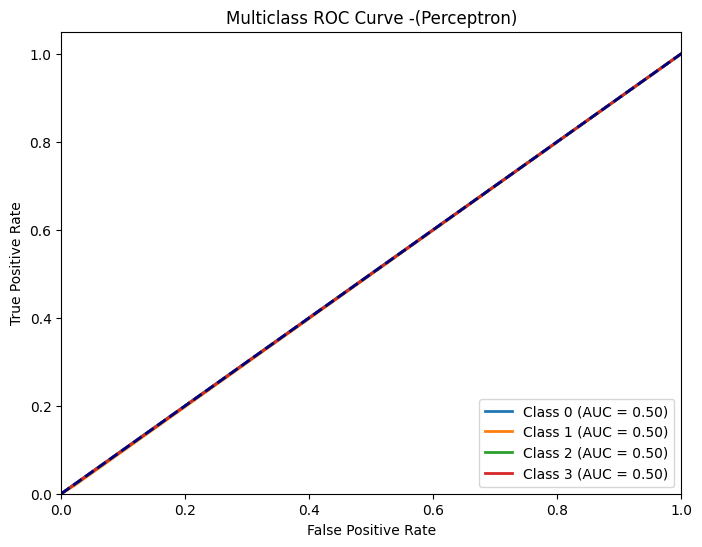

In [ ]:
model =Perceptron()
model.fit(X_train, y_train)

decision_values = model.decision_function(X_test)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

prob_preds = sigmoid(decision_values)

n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

plt.figure(figsize=(8, 6))
for i in range(n_classes):

    fpr, tpr, _ = roc_curve(y_test_bin[:, i], prob_preds[:, i])
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve -(Perceptron)')
plt.legend(loc="lower right")
plt.show()

# **HyperParameter Tunning**

In [ ]:
X=df_le.drop("Workout_Type",axis=1)
y=df_le["Workout_Type"]

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)


best_model_knn = grid_search_knn.best_estimator_


y_test_pred_knn = best_model_knn.predict(X_test_scaled)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)


y_val_pred_knn = best_model_knn.predict(X_val_scaled)
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)

print("Validation Accuracy (5-Fold CV) for KNN:", grid_search_knn.best_score_)
print("Validation Accuracy (Validation Set) for KNN:", val_accuracy_knn)
print("Test Accuracy for KNN:", test_accuracy_knn)


Validation Accuracy (5-Fold CV) for KNN: 0.2819849874895747
Validation Accuracy (Validation Set) for KNN: 0.23497267759562843
Test Accuracy for KNN: 0.27049180327868855


In [ ]:

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    "max_iter":[100,300,500,1000],

    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


log_reg = LogisticRegression()


grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_


y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)


y_val_pred = best_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(best_model.get_params)
print("Validation Accuracy (5-Fold CV):", grid_search.best_score_)
print("Validation Accuracy (Validation Set):", val_accuracy)
print("Test Accuracy:", test_accuracy)


<bound method BaseEstimator.get_params of LogisticRegression(C=1, penalty='l1', solver='liblinear')>
Validation Accuracy (5-Fold CV): 0.2929274395329441
Validation Accuracy (Validation Set): 0.22950819672131148
Test Accuracy: 0.3155737704918033


In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)


param_grid_perceptron = {
    'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000],
    'eta0': [1, 0.1, 0.01]
}


perceptron = Perceptron()


grid_search_perceptron = GridSearchCV(perceptron, param_grid_perceptron, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_perceptron.fit(X_train_scaled, y_train)


best_model_perceptron = grid_search_perceptron.best_estimator_

y_test_pred_perceptron = best_model_perceptron.predict(X_test_scaled)
test_accuracy_perceptron = accuracy_score(y_test, y_test_pred_perceptron)

y_val_pred_perceptron = best_model_perceptron.predict(X_val_scaled)
val_accuracy_perceptron = accuracy_score(y_val, y_val_pred_perceptron)


print("Validation Accuracy (5-Fold CV) for Perceptron:", grid_search_perceptron.best_score_)
print("Validation Accuracy (Validation Set) for Perceptron:", val_accuracy_perceptron)
print("Test Accuracy for Perceptron:", test_accuracy_perceptron)


Validation Accuracy (5-Fold CV) for Perceptron: 0.2783986655546289
Validation Accuracy (Validation Set) for Perceptron: 0.2568306010928962
Test Accuracy for Perceptron: 0.22540983606557377


# **Why Metric and Auc Scores are so Low?**

We made outlier treatment(Although there were few outliers). Still our scores are pretty low. Reasons will be checked.

# **Target Value-Features Relationship**

In [ ]:
from scipy.stats import f_oneway, pointbiserialr
from sklearn.feature_selection import mutual_info_classif

for num in list(num_cols):

  anova_result = f_oneway(df_le[df_le["Workout_Type"] == df_le["Workout_Type"].unique()[0]][num],
                        df_le[df_le["Workout_Type"] == df_le["Workout_Type"].unique()[1]][num],
                        df_le[df_le["Workout_Type"] == df_le["Workout_Type"].unique()[2]][num],
                        df_le[df_le["Workout_Type"] == df_le["Workout_Type"].unique()[3]][num])
  print(num,"ANOVA p-value:", anova_result.pvalue)


Age ANOVA p-value: 0.4799531239853019
Weight (kg) ANOVA p-value: 0.3861752533680406
Height (m) ANOVA p-value: 0.37026108344779035
Max_BPM ANOVA p-value: 0.4844058982212197
Avg_BPM ANOVA p-value: 0.8626559341770745
Resting_BPM ANOVA p-value: 0.5137304101046656
Session_Duration (hours) ANOVA p-value: 0.19339847317971093
Calories_Burned ANOVA p-value: 0.6604806890678121
Fat_Percentage ANOVA p-value: 0.1285059261742993
Water_Intake (liters) ANOVA p-value: 0.7554137833182183
Workout_Frequency (days/week) ANOVA p-value: 0.37637418610178547
Experience_Level ANOVA p-value: 0.2962839231404126
BMI ANOVA p-value: 0.3044314525034435


As we can see according to Anova Test, no features demonstrate any strong relationship with target value(p>0.05). However, Anova test mostly work well for regression problems since it is mostly good indicator for numerical features-numerical target value relationship. In our problem we work on classification problem so we can do another method to check the results

In [ ]:
from sklearn.feature_selection import mutual_info_classif



X=df_le.drop("Workout_Type",axis=1)
y=df_le["Workout_Type"]



mi_scores = mutual_info_classif(X, y, random_state=42)


mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(mi_scores_df)

                          Feature  MI Score
4                         Max_BPM  0.029329
2                     Weight (kg)  0.023756
12               Experience_Level  0.012751
0                             Age  0.003444
10          Water_Intake (liters)  0.002883
1                          Gender  0.002059
3                      Height (m)  0.000000
5                         Avg_BPM  0.000000
6                     Resting_BPM  0.000000
7        Session_Duration (hours)  0.000000
8                 Calories_Burned  0.000000
9                  Fat_Percentage  0.000000
11  Workout_Frequency (days/week)  0.000000
13                            BMI  0.000000


As we can see nearly whole features have so weak relationship or completely independent than target value(Anova Test was True). This can explain why Accuracy Scores are pretty low

# **Multicollinetary Check**

<Axes: >

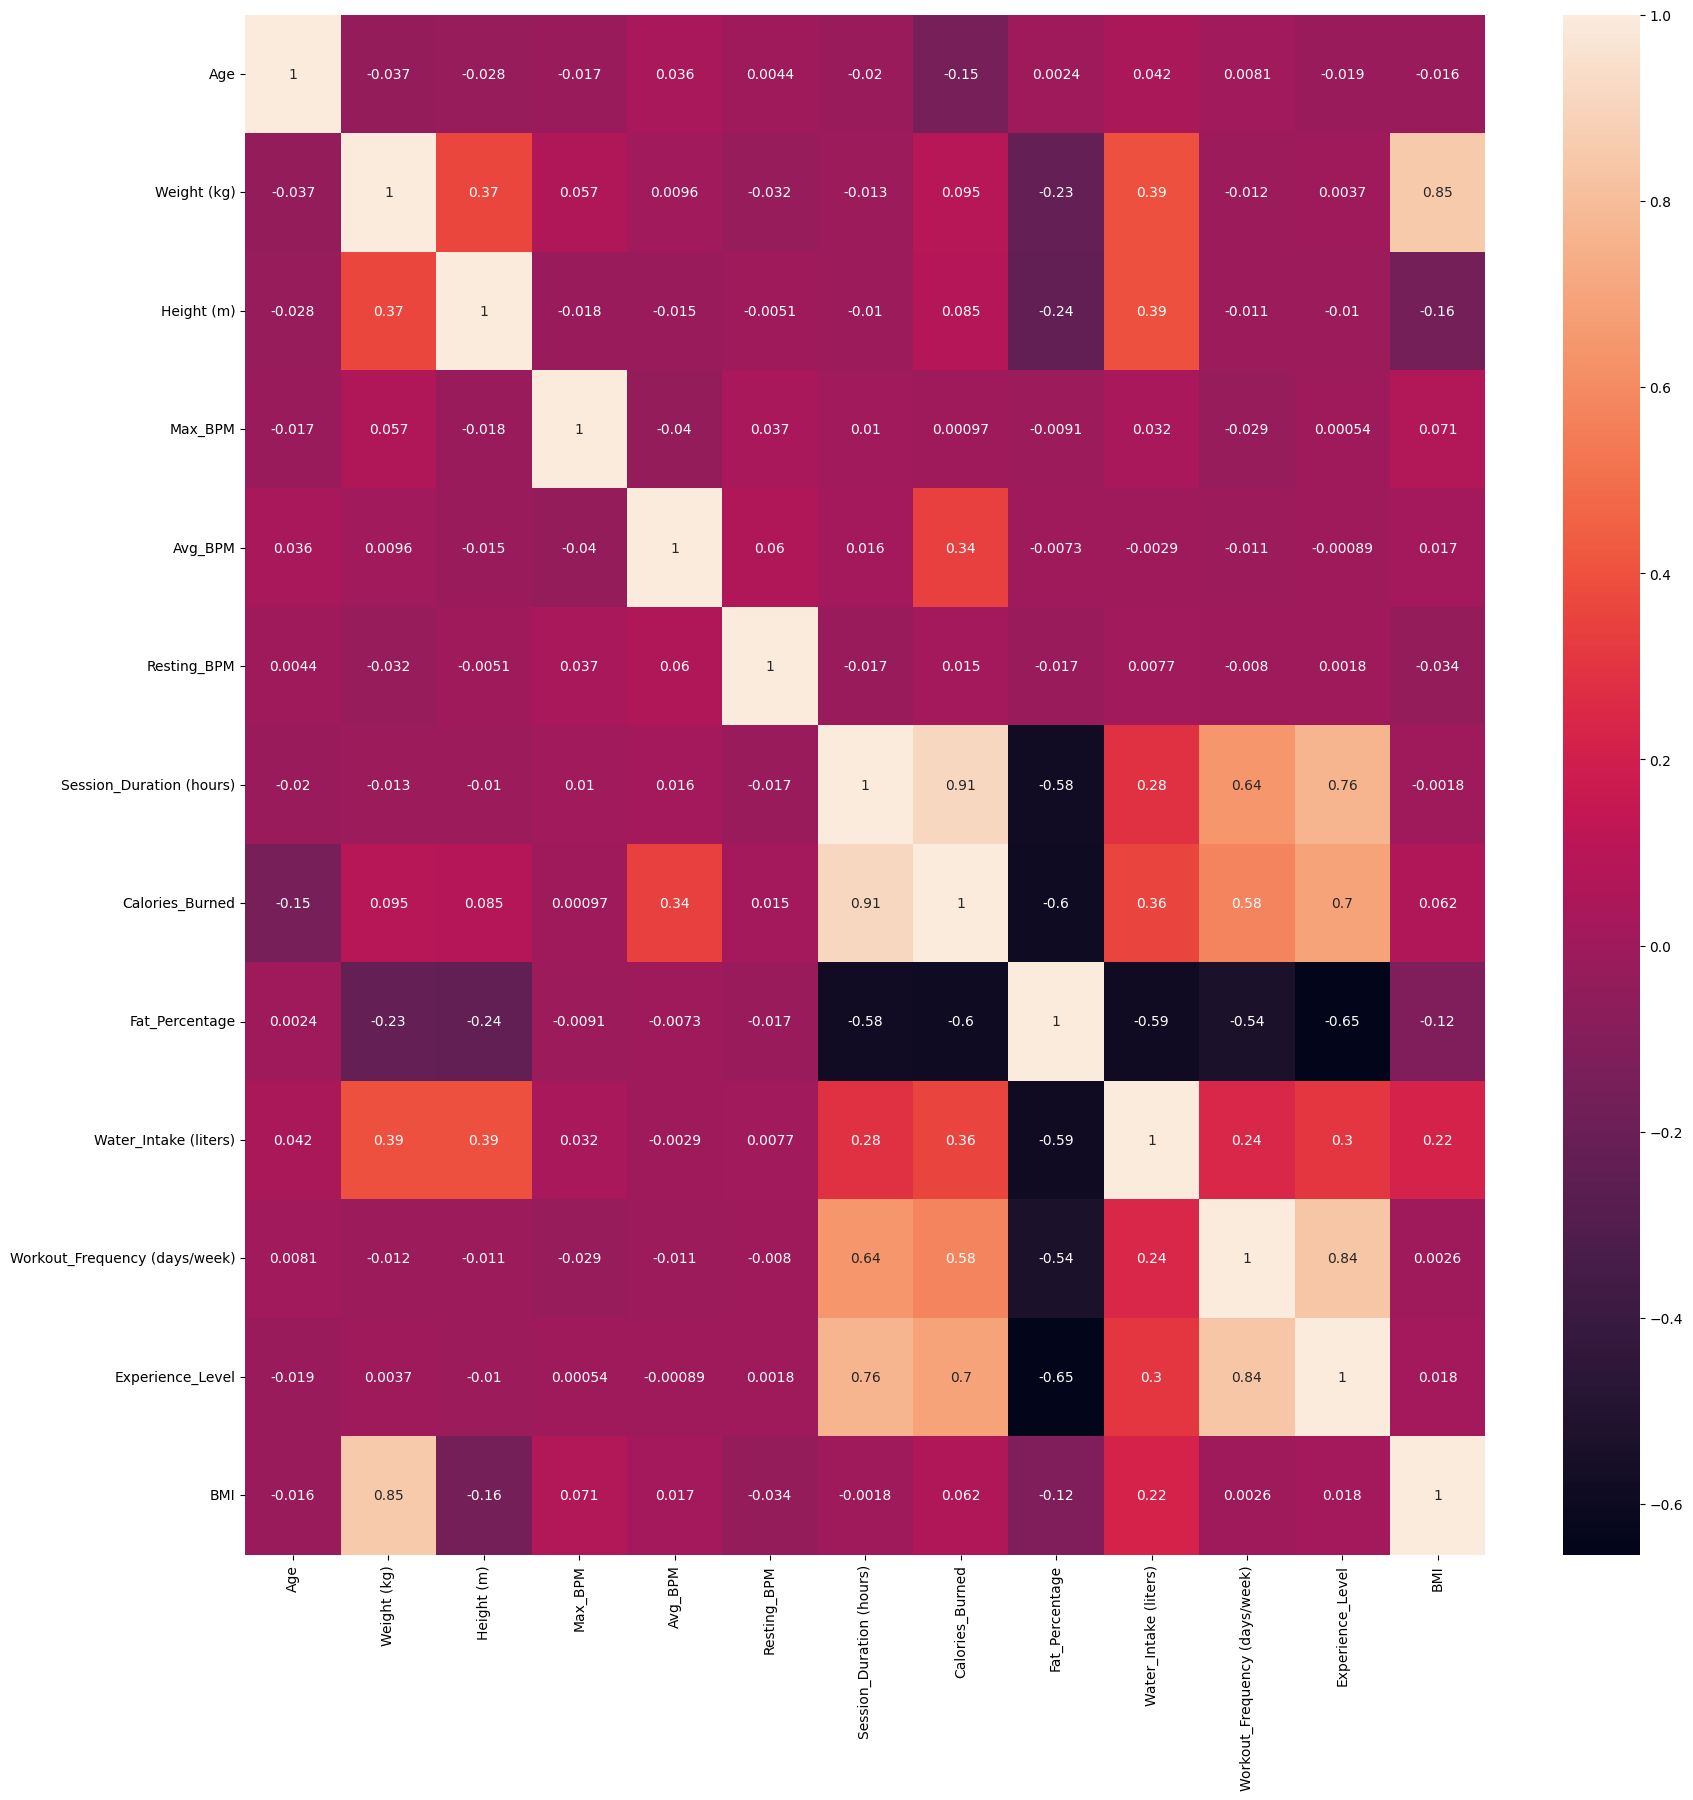

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df[list(num_cols)].corr(),annot=True)

During our previous analysis we found some features are highly correlated(Pearson Coef>0.7). But this method only gives us feature-feature correlation. Some features can be highly correlated with some feature groups. To see it in better aspect. VIF(Variance Inflation Factor can be used).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def calculate_vif(dataframe):
    X = add_constant(dataframe)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data


vif_results = calculate_vif(num_cols)


print(vif_results)

                          Feature          VIF
0                           const  5434.206084
1                             Age     1.837518
2                     Weight (kg)    72.928494
3                      Height (m)    21.639079
4                         Max_BPM     1.012668
5                         Avg_BPM     4.918906
6                     Resting_BPM     1.015756
7        Session_Duration (hours)    30.576931
8                 Calories_Burned    36.035547
9                  Fat_Percentage     2.659009
10          Water_Intake (liters)     1.973044
11  Workout_Frequency (days/week)     3.367934
12               Experience_Level     5.347124
13                            BMI    66.041357


As we can see, height feature wasn't correlated with any feature in pearson heatmap. But here height has correlation with a feature group(It is probably BMI-Weight since to calculate BMI we need height)

# **Variance Analysis**

Variance of features are important. Low variance features can create noise for some models(especially KNN). Since our dataset mostly contains numerical values, let's check the variance value of our numerical features

In [ ]:
num_cols.var()

Age                                148.375004
Weight (kg)                        449.758077
Height (m)                           0.016312
Max_BPM                            132.841437
Avg_BPM                            205.781935
Resting_BPM                         53.685807
Session_Duration (hours)             0.117672
Calories_Burned                  74333.396493
Fat_Percentage                      39.180324
Water_Intake (liters)                0.360206
Workout_Frequency (days/week)        0.833655
Experience_Level                     0.547145
BMI                                 44.367314
dtype: float64

Here it is obvious that some features have low variances. To make our models more efficient,we can get rid of low variance features(Thereshold=0.1 or closer according to performance)

**Overall**:

**1-** Biggest reason that our accuracy scores are low, features don't contain good information about target value. To solve this problem, more meaningful features can be added to dataset.

**2-** Multicollinatary can be a problem too. Especially for Logistic Regression model. However, since Logistic Regression here was used for prediction model not as decriptive nor inference model like in data mining,multicollinetary is not a big problem for logistic regression(we don't focus on betas, we focus on p). In addition, effectiveness of Logistic Regression is more dependent to informations that features are carrying and our whole features don't demonstrate good information for target value. That's why  losing them can reduce accuracy of logistic regression so hyperparameter optimization can be main optimization that increase logistic regression accuracy. Multicollinetary also has less effect on KNN(Since it is a non parametric model).

**3-** Low variance features can effect the model(especially KNN). We can get rid of them by dropping or applying PCA

# **What we should do now?**

Our 3 models are using different methods to make prediction. Some of them are more sensitive to high dimension and noises or multicollinetary problem. Moreover, although all of them get effected from uneffectiveness of our features, all of them may react different to solution of the problem. That's why best method is applying those to each models differently according to model's working principle(for example dimension reduction can be more helpful for KNN than Logistic Regression Etc.).

# **KNN Optimization**

# **Parameter and Hyperparameter Optimization**

KNN is an algorithm which is so sensitive to noises. Also Dimension is also important for KNN because of Cursed of Dimention. So to check the noise we can examine the variance of our features. Low variances features don't contribute to our models and cause lower accuracy.

# **Method 1 Feature Selection by Using Variance and Target Value Relationship**

In [ ]:
df_le_KNN=df_le.drop(["Height (m)","BMI","Workout_Frequency (days/week)"],axis=1)

We dropped two lowest contributed features and low variance feature(since it is lower than our threshold(0.1)

In [ ]:
X=df_le_KNN.drop("Workout_Type",axis=1)
y=df_le_KNN["Workout_Type"]

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_scaled,y_train)
y_pred=knn_model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.2827868852459016

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)

param_grid_knn = {
    'n_neighbors': [2,3,5,7,9,10,12],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)


best_model_knn = grid_search_knn.best_estimator_


y_test_pred_knn = best_model_knn.predict(X_test_scaled)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)


y_val_pred_knn = best_model_knn.predict(X_val_scaled)
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)

print("Validation Accuracy (5-Fold CV) for KNN:", grid_search_knn.best_score_)
print("Validation Accuracy (Validation Set) for KNN:", val_accuracy_knn)
print("Test Accuracy for KNN:", test_accuracy_knn)

Validation Accuracy (5-Fold CV) for KNN: 0.30398665554628856
Validation Accuracy (Validation Set) for KNN: 0.23497267759562843
Test Accuracy for KNN: 0.27459016393442626


Without hyperparameter optimization score is better. Moreover,both score is higher than original dataset. However since KNN is so sensitive to dimensionality and variance, applying PCA may give even better results.

# **Method 2 PCA**

In [ ]:
X=df_le.drop("Workout_Type",axis=1)
y=df_le["Workout_Type"]

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN Accuracy(After PCA): 24.59%


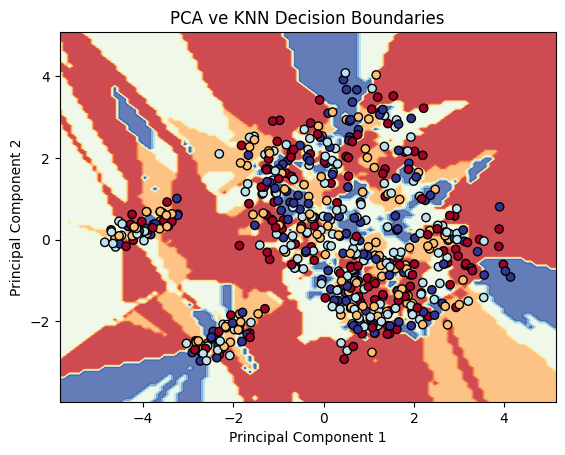

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)


y_pred = knn.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy(After PCA): {accuracy * 100:.2f}%")


x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title("PCA ve KNN Decision Boundaries")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_pca, y_train)


best_model_knn = grid_search_knn.best_estimator_


y_test_pred_knn = best_model_knn.predict(X_test_pca)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)


print("Validation Accuracy (5-Fold CV) for KNN:", grid_search_knn.best_score_)
print("Test Accuracy for KNN:", test_accuracy_knn)

Validation Accuracy (5-Fold CV) for KNN: 0.2673561301084237
Test Accuracy for KNN: 0.29508196721311475


As it can be seen PCA increased the accuracy even more after hyperparameter tunning.

# **Perceptron Optimization**

# **Parameter and Hyperparameter Optimization**

Perceptron is a machine learning algorithm that works better on linear boundaries. Compared to KNN, it gets less effected by low variance features and dimensionality. Low variance features may decrease performance so small or maybe even not. Data number is also important for perceptron.

# **Method 1 Variance Effect Check**

In [ ]:
df_le_Perceptron=df_le.drop(["BMI","Workout_Frequency (days/week)"],axis=1)

Dropped least effective feature.

In [ ]:
X=df_le_Perceptron.drop("Workout_Type",axis=1)
y=df_le_Perceptron["Workout_Type"]

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

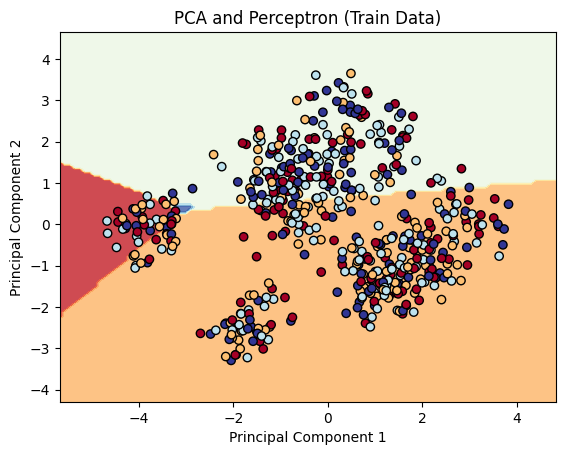

Model Accuracy: 21.31%


In [ ]:


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)


if np.any(np.isnan(X_train_pca)) or np.any(np.isinf(X_train_pca)):

    X_train_pca = np.nan_to_num(X_train_pca, nan=0, posinf=0, neginf=0)


perceptron = Perceptron()
perceptron.fit(X_train_pca, y_train)


X_test_pca = pca.transform(X_test_scaled)

if np.any(np.isnan(X_test_pca)) or np.any(np.isinf(X_test_pca)):

    X_test_pca = np.nan_to_num(X_test_pca, nan=0, posinf=0, neginf=0)


x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))


Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title("PCA and Perceptron (Train Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

y_pred = perceptron.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

In [ ]:
param_grid_perceptron = {
    'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000],
    'eta0': [1, 0.1, 0.01]
}

# Perceptron modeli
perceptron = Perceptron()


grid_search_perceptron = GridSearchCV(perceptron, param_grid_perceptron, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_perceptron.fit(X_train_pca, y_train)


best_model_perceptron = grid_search_perceptron.best_estimator_


y_test_pred_perceptron = best_model_perceptron.predict(X_test_pca)
test_accuracy_perceptron = accuracy_score(y_test, y_test_pred_perceptron)


print("Validation Accuracy (5-Fold CV) for Perceptron:", grid_search_perceptron.best_score_)
print("Test Accuracy for Perceptron:", test_accuracy_perceptron)

Validation Accuracy (5-Fold CV) for Perceptron: 0.2655546288573812
Test Accuracy for Perceptron: 0.29508196721311475


Accuracy increased compared to original model after hyperparameter optimization. Low variance freatures may have an effect on the perceptron. But still low variance is not main concern of the model,so checking other methods which are more suitable to model's working principle can be more useful.

# **Method 2 Converting Features to Polynomial**

Perceptron is an algorithm that uses best on linearly seperable dataset. When we examine our dataset, some of our future does not look linearly seperable and has complex boundaries. To enchance our model performnce, we can convert our features to polynomial. It helps model to learn complex boundaries easier.

In [ ]:
df_le_Perceptron=df_le.drop(["BMI"],axis=1)

In [ ]:
X=df_le_Perceptron.drop("Workout_Type",axis=1)
y=df_le_Perceptron["Workout_Type"]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
perceptron=Perceptron()
perceptron_model=perceptron.fit(X_train_scaled,y_train)
y_pred=perceptron_model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.2786885245901639

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)


param_grid_perceptron = {
    'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000],
    'eta0': [1, 0.1, 0.01]
}


perceptron = Perceptron()


grid_search_perceptron = GridSearchCV(perceptron, param_grid_perceptron, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_perceptron.fit(X_train_scaled, y_train)


best_model_perceptron = grid_search_perceptron.best_estimator_


y_test_pred_perceptron = best_model_perceptron.predict(X_test_scaled)
test_accuracy_perceptron = accuracy_score(y_test, y_test_pred_perceptron)


y_val_pred_perceptron = best_model_perceptron.predict(X_val_scaled)
val_accuracy_perceptron = accuracy_score(y_val, y_val_pred_perceptron)


print("Validation Accuracy (5-Fold CV) for Perceptron:", grid_search_perceptron.best_score_)
print("Validation Accuracy (Validation Set) for Perceptron:", val_accuracy_perceptron)
print("Test Accuracy for Perceptron:", test_accuracy_perceptron)


Validation Accuracy (5-Fold CV) for Perceptron: 0.2930442035029191
Validation Accuracy (Validation Set) for Perceptron: 0.22404371584699453
Test Accuracy for Perceptron: 0.3155737704918033


As it can be seen, model's performance even increased more when we converted to features to polynomial.

# **Logistic Regression Optimization**

# **Method 1 Target Value Relationship**

In [ ]:
df_le_logistic=df_le.drop(["BMI"],axis=1)

In [ ]:
X=df_le_logistic.drop("Workout_Type",axis=1)
y=df_le_logistic["Workout_Type"]

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
LR=LogisticRegression()
LR_model=LR.fit(X_train_scaled,y_train)
y_pred=LR_model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.30327868852459017

In [ ]:
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ["liblinear",'saga'],
    'max_iter': [1000, 2000]
}


logreg = LogisticRegression()


grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_scaled, y_train)


best_model_logreg = grid_search_logreg.best_estimator_


y_test_pred_logreg = best_model_logreg.predict(X_test_scaled)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)




print("Validation Accuracy (5-Fold CV) for Logistic Regression:", grid_search_logreg.best_score_)
print("Test Accuracy for Logistic Regression:", test_accuracy_logreg)


Validation Accuracy (5-Fold CV) for Logistic Regression: 0.2892743953294412
Test Accuracy for Logistic Regression: 0.3155737704918033


Although model performance didn't change, one feature got eliminated from model and got same score.

# **Method 2 Variance and Multicollinetary Check**

Logistic Regression Accuracy(After PCA): 26.64%


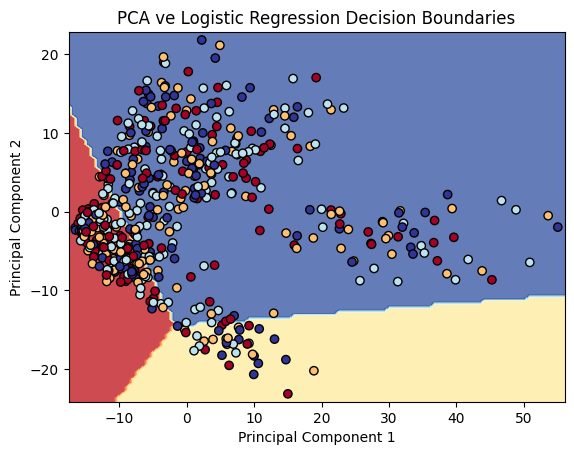

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


LR= LogisticRegression()
LR.fit(X_train_pca, y_train)


y_pred = LR.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy(After PCA): {accuracy * 100:.2f}%")


x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title("PCA ve Logistic Regression Decision Boundaries")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ["l2"],
    'solver': ['lbfgs','liblinear']
}

log_reg = LogisticRegression(max_iter=10000)

grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_pca, y_train)

best_model_lr = grid_search_lr.best_estimator_

y_test_pred_lr = best_model_lr.predict(X_test_pca)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print("Validation Accuracy (5-Fold CV) for Logistic Regression:", grid_search_lr.best_score_)
print("Test Accuracy for Logistic Regression:", test_accuracy_lr)


Validation Accuracy (5-Fold CV) for Logistic Regression: 0.2526772310258549
Test Accuracy for Logistic Regression: 0.26639344262295084


As it can be seen low variance does not effect logistic regression accuracy negatively. Moreover, we saw again that since logistic regression is used for prediction(not descriptive nor inference),multicollinetary didn't effect model's performance.

# **Method 3 Converting to Polynomial Features**

In [ ]:
df_le_logistic=df_le.drop(["BMI"],axis=1)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
LR=LogisticRegression()
LR_model=LR.fit(X_train_scaled,y_train)
y_pred=LR_model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.28688524590163933

In [ ]:
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ["liblinear",'saga'],
    'max_iter': [1000, 2000]
}


logreg = LogisticRegression()


grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_scaled, y_train)


best_model_logreg = grid_search_logreg.best_estimator_


y_test_pred_logreg = best_model_logreg.predict(X_test_scaled)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)




print("Validation Accuracy (5-Fold CV) for Logistic Regression:", grid_search_logreg.best_score_)
print("Test Accuracy for Logistic Regression:", test_accuracy_logreg)


Validation Accuracy (5-Fold CV) for Logistic Regression: 0.2783819849874896
Test Accuracy for Logistic Regression: 0.22950819672131148


First method was the most succesful one